L'équipe s’intéresse de près aux émissions des bâtiments non destinés à l’habitation. Vous voulez tenter de prédire les **émissions de CO2 et la consommation totale d’énergie de bâtiments** pour lesquels elles **n’ont pas encore été mesurées**.
Vous cherchez également à évaluer l’intérêt de l’"ENERGY STAR Score" pour la prédiction d’émissions, qui est fastidieux à calculer avec l’approche utilisée actuellement par votre équipe.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.set_option('display.max_columns', None)

Variables d'intérêts:
* TotalGHGEmissions unit: (MetricTonsCO2e)
* GHGEmissionsIntensity unit: (kgCO2e/ft2)
* Electricity(kWh)	

Abréviation:
* GHG Emissions : gaz à effet de serre.
* kBtu : kilo-British thermal unit. (1 kWh x 3.412 = 3.412 kBtu.)
* GFA (Gross Flor area) Surface hors œuvre brute (Floor area (building))
* EUI: Energy Use Intensity (energy per square foot per year)

Unité:
* Surface space in square feet
* 1 kWh x 3.412 = 3.412 kBtu


**Energy star**
* Evaluate actual billed energy data
* Normalize for business activity (hours, workers, climate)
* Compare buildings to the national population
* Indicate the level of energy performance

Higher score means better performance

In [3]:
def count_Nan(dt):
    dt.shape[1]
    empty_col = []
    for col in list(dt.columns):
        lines = len(dt.loc[:,col])
        nb_na = dt.loc[:,col].isna().sum()
        if nb_na/lines >= 0.50:
            print("{0}: {1:.3}% NaN".format(col, nb_na/lines * 100))
            empty_col.append(col)
    return empty_col

# Chargement des données

In [4]:
dt_2015 = pd.read_csv("2015-building-energy-benchmarking.csv", sep =",", header = 0)
print("{0} lignes et colonnes {1}".format(dt_2015.shape[0], dt_2015.shape[1]))
dt_2016 = pd.read_csv("2016-building-energy-benchmarking.csv", sep =",", header = 0)
print("{0} lignes et colonnes {1}".format(dt_2016.shape[0], dt_2016.shape[1]))

3340 lignes et colonnes 47
3376 lignes et colonnes 46


In [5]:
dt_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [6]:
dt_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


**Les colonnes ne sont pas les mêmes dans les fichiers de 2016 et 2015**, Location et divisé en latitude et longitude

# Données manquantes

In [7]:
ar1 = dt_2015['OSEBuildingID'].values
ar2 = dt_2016['OSEBuildingID'].values
#batiment présent en 2015 mais en 2016
ind = np.setdiff1d(ar1, ar2, assume_unique=False)

Des bâtiments ne sont plus présents en 2016, on les récupère et on crée un nouveau data frame

In [8]:
tmp = dt_2015['OSEBuildingID'].isin(ind)
dt = pd.concat([dt_2016, dt_2015.loc[tmp]])
dt.tail()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,Location,OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Comment,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
3086,27985,2015,Multifamily LR (1-4),Low-Rise Multifamily,LICTON SPRINGS APT,NaN,NaN,NaN,NaN,4310701340,5,NORTHWEST,NaN,NaN,1987,1.0,3.0,34023,8685,25338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,20.6,22.1,64.5,69.5,699376.0,752612.0,0.0,204975.0,699405.0,0.0,0.0,No,NaN,Compliant,NaN,NaN,NaN,"{'latitude': '47.69838396', 'longitude': '-122...",0.0,4.88,0.05,NaN,NaN,46.0,NaN,34.0,18377.0
3107,28045,2015,Multifamily MR (5-9),Mid-Rise Multifamily,TRESSA APARTMENTS BUILDING 1,NaN,NaN,NaN,NaN,4340200000,5,NORTHWEST,NaN,NaN,2010,1.0,6.0,375502,137061,238441,"Multifamily Housing, Retail Store",Multifamily Housing,352633.0,Retail Store,6655.0,NaN,NaN,NaN,NaN,24.7,25.3,70.6,72.1,8890235.0,9094326.0,0.0,2248459.0,7672061.0,12185.0,1218492.0,No,NaN,Compliant,NaN,NaN,NaN,"{'latitude': '47.7317276', 'longitude': '-122....",0.0,118.20,0.23,NaN,116.0,6.0,1.0,33.0,19582.0
3114,28064,2015,Multifamily LR (1-4),Low-Rise Multifamily,THE VILLAGE WEST APTS,NaN,NaN,NaN,NaN,4365700545,1,DELRIDGE,NaN,NaN,1968,1.0,4.0,40940,0,40940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,30.5,32.4,95.9,101.6,1250592.0,1324891.0,0.0,366528.0,1250644.0,0.0,0.0,No,NaN,Compliant,NaN,NaN,NaN,"{'latitude': '47.52141906', 'longitude': '-122...",0.0,8.72,0.08,NaN,NaN,54.0,NaN,14.0,18385.0
3235,49769,2015,Multifamily MR (5-9),Mid-Rise Multifamily,Test MF High Use (ID 49769),NaN,NaN,NaN,NaN,NaN,6,LAKE UNION,NaN,NaN,1920,1.0,5.0,43998,0,43998,Multifamily Housing,Multifamily Housing,32000.0,NaN,NaN,NaN,NaN,NaN,100.0,31.5,40.1,35.8,44.9,1007650.0,1282870.0,0.0,12500.0,42652.0,9650.0,965000.0,No,NaN,Compliant,NaN,NaN,NaN,"{'latitude': '47.6590538024902', 'longitude': ...",0.0,51.55,1.17,NaN,NaN,20.0,NaN,2.0,18377.0
3272,49859,2015,Campus,Other,AMGEN INC. MASTER CAMPUS,NaN,NaN,NaN,NaN,7666201725,7,MAGNOLIA / QUEEN ANNE,NaN,NaN,2002,7.0,4.0,808520,376000,432520,Other,Other,808520.0,NaN,NaN,NaN,NaN,NaN,NaN,194.9,206.0,403.0,414.6,157606480.0,166523440.0,0.0,22490860.0,76742000.0,808676.0,80867644.0,No,NaN,Compliant,NaN,NaN,NaN,"{'latitude': '47.62811223', 'longitude': '-122...",0.0,4829.86,5.57,NaN,NaN,50.0,NaN,27.0,19575.0


On complète la localisation

## Ajout de la longitude et latitude

In [9]:
ind = np.setdiff1d(ar1, ar2, assume_unique=False)
ind_old = dt_2015['OSEBuildingID'].isin(ind)
ind_dt_from_2015 = dt['OSEBuildingID'].isin(ind)
#dt.loc[ind_dt_from_2015]

In [10]:
ind = np.setdiff1d(ar1, ar2, assume_unique=False)
lines = dt_2015.loc[ind_old,"Location"].values
latitude = []
longitude = []
for line in lines:
    latitude.append(line.split("'")[3])
    longitude.append(line.split("'")[7])

latitude = np.array(latitude, dtype=float)
longitude = np.array(longitude, dtype=float)
dt.loc[ind_dt_from_2015, "Latitude"] = latitude
dt.loc[ind_dt_from_2015, "Longitude"] = longitude


## GHGEmissionsIntensity et TotalGHGEmissions

In [11]:
dt.loc[ind_dt_from_2015,"GHGEmissionsIntensity"] = dt_2015.loc[ind_old,"GHGEmissionsIntensity(kgCO2e/ft2)"]
dt.loc[ind_dt_from_2015,"TotalGHGEmissions"] = dt_2015.loc[ind_old,"GHGEmissions(MetricTonsCO2e)"]

In [12]:
dt.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,Location,OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Comment,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41.0,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18.0,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Doublon

In [13]:
dt = dt.sort_values(by ='OSEBuildingID')
dt = dt.drop_duplicates()
dt.shape

(3432, 56)

# Elimination des résidences

In [14]:
dt['BuildingType'].value_counts()

NonResidential          1488
Multifamily LR (1-4)    1040
Multifamily MR (5-9)     584
Multifamily HR (10+)     110
SPS-District K-12         99
Nonresidential COS        85
Campus                    25
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [15]:
#On retire tous les bâtiments de type Multifamily
ind = dt['BuildingType'].str.contains('Multifamily', regex=False, na=False)
nonResid = dt[~ind]
nonResid['BuildingType'].value_counts()
#ind  = nonResid_2015['LargestPropertyUseType'].str.contains('Multifamily', regex=False, na=False)

NonResidential        1488
SPS-District K-12       99
Nonresidential COS      85
Campus                  25
Nonresidential WA        1
Name: BuildingType, dtype: int64

SPS : école

# Qualité des variables

On évalue les variables qui ont au minimum de 50% de champ manquante

In [16]:
empty_col = count_Nan(nonResid)

ThirdLargestPropertyUseType: 79.0% NaN
ThirdLargestPropertyUseTypeGFA: 79.0% NaN
YearsENERGYSTARCertified: 94.2% NaN
Comments: 1e+02% NaN
Outlier: 98.9% NaN
Location: 98.2% NaN
OtherFuelUse(kBtu): 98.3% NaN
GHGEmissions(MetricTonsCO2e): 98.3% NaN
GHGEmissionsIntensity(kgCO2e/ft2): 98.3% NaN
Comment: 99.9% NaN
2010 Census Tracts: 99.9% NaN
Seattle Police Department Micro Community Policing Plan Areas: 98.2% NaN
City Council Districts: 99.9% NaN
SPD Beats: 98.2% NaN
Zip Codes: 98.2% NaN


GHGEmissions(MetricTonsCO2e) et GHGEmissionsIntensity(kgCO2e/ft2) contiennent uniquement les données de 2015. Leur valeurs ont été rajoutées dans les bonnes variables. On va donc retirer ces colonnes

In [17]:
nonResid = nonResid.drop(empty_col, axis=1)
empty_col = count_Nan(nonResid)

In [18]:
nonResid.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,Compliant,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,Compliant,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41.0,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,Compliant,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,Compliant,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18.0,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,Compliant,505.01,2.88


# Boxplot

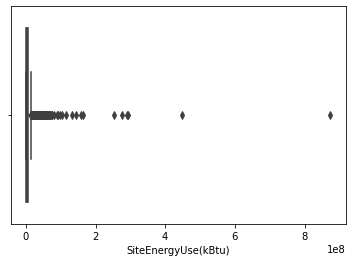

In [19]:
ax = sns.boxplot(x=nonResid["SiteEnergyUse(kBtu)"])

In [20]:
Q1 = nonResid["SiteEnergyUse(kBtu)"].quantile(0.25)                 
Q3 = nonResid["SiteEnergyUse(kBtu)"].quantile(0.75)
IQ = Q3 - Q1

In [21]:
Q3 + 1.5 * IQ

15339840.96875

On vérifie les bâtiments qui ont des consommations nuls ou négatives en énergie

In [23]:
nonResid.loc[nonResid["SiteEnergyUse(kBtu)"] <= 0]
#Ces bâtiments ont des données manquantes et doivent être retirés

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
28,34,2016,SPS-District K-12,K-12 School,Meany Building,301/300 21st Ave. E.,Seattle,WA,98112.0,0688000090,3,Central,47.62266,-122.30547,1955,1.0,1.0,126351,0,126351,K-12 School,K-12 School,126351.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,False,Missing Data,0.00,0.00
31,37,2016,SPS-District K-12,K-12 School,John Hay Elementary,201 Garfield St.,Seattle,WA,98109.0,0809000005,7,MAGNOLIA / QUEEN ANNE,47.63290,-122.35172,1989,1.0,2.0,51582,0,51582,K-12 School,K-12 School,55166.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,438691.6875,1496816.0,0.000000,0.0,False,Missing Data,10.43,0.20
62,87,2016,SPS-District K-12,K-12 School,Arbor Heights Elementary,3701 S.W. 104th St.,Seattle,WA,98146.0,2518400005,1,SOUTHWEST,47.50970,-122.37759,1948,1.0,2.0,53352,0,53352,K-12 School,K-12 School,65568.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176088.0938,600813.0,0.000000,0.0,False,Missing Data,4.19,0.08
81,118,2016,SPS-District K-12,K-12 School,Pathfinder K-8,1901 SW Genesee St.,Seattle,WA,98106.0,1324039116,1,DELRIDGE,47.56360,-122.35800,1999,1.0,3.0,74468,0,74468,K-12 School,K-12 School,75364.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,497706.8125,1698176.0,0.000000,0.0,False,Missing Data,11.84,0.16
85,122,2016,SPS-District K-12,K-12 School,John Muir Elementary,3301 S. Horton St.,Seattle,WA,98144.0,1524049002,2,SOUTHEAST,47.57324,-122.29058,1991,1.0,2.0,58933,0,58933,K-12 School,K-12 School,60725.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,687906.8750,2347138.0,0.000000,0.0,False,Missing Data,16.36,0.28
95,140,2016,SPS-District K-12,K-12 School,B.F. Day Elementary,3921 Linden Ave. N.,Seattle,WA,98103.0,1931301145,6,LAKE UNION,47.65464,-122.34912,1991,1.0,3.0,66588,0,66588,K-12 School,K-12 School,66588.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,616730.8125,2104286.0,0.000000,0.0,False,Missing Data,14.67,0.22
133,217,2016,SPS-District K-12,K-12 School,Whitman Middle,9201 15th Ave. NW.,Seattle,WA,98117.0,3526039131,6,BALLARD,47.69675,-122.37760,1959,1.0,1.0,160270,0,160270,K-12 School,K-12 School,160270.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,43189.171880,4318917.0,False,Missing Data,229.38,1.43
139,227,2016,SPS-District K-12,K-12 School,Washington Middle,2101 S. Jackson,Seattle,WA,98144.0,3646100540,3,CENTRAL,47.59796,-122.30415,1963,1.0,3.0,136188,0,136188,K-12 School,K-12 School,136188.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,32178.773440,3217877.0,False,Missing Data,170.90,1.25
152,242,2016,SPS-District K-12,K-12 School,Olympic View Elementary,504 N.E. 95th St.,Seattle,WA,98115.0,5100404840,5,NORTH,47.69823,-122.32126,1989,1.0,2.0,52792,0,52792,K-12 School,K-12 School,55480.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,False,Missing Data,0.00,0.00
304,435,2016,NonResidential,Other,Washington State Convention Center,705 Pike St,Seattle,WA,98101.0,1978200105,7,DOWNTOWN,47.61195,-122.33167,1990,1.0,6.0,1400000,0,1400000,"Convention Center, Parking",Convention Center,1072000.0,Parking,686750.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,False,Non-Compliant,0.00,0.00


In [22]:
indice = nonResid["SiteEnergyUse(kBtu)"] <= 0
nonResid = nonResid.loc[~indice]

In [23]:
indice = nonResid.loc[:,"SiteEnergyUse(kBtu)"] >= Q1 - 1.5 * IQ
nonResid = nonResid.loc[indice]
indice = nonResid.loc[:,"SiteEnergyUse(kBtu)"] <= Q3 + 1.5 * IQ
nonResid = nonResid.loc[indice]

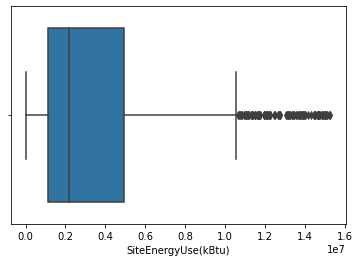

In [24]:
ax = sns.boxplot(x=nonResid["SiteEnergyUse(kBtu)"])

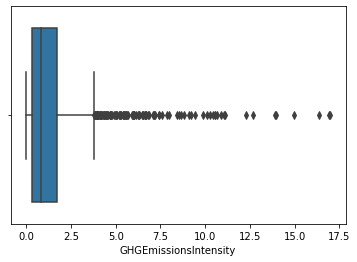

In [25]:
ax = sns.boxplot(x=nonResid["GHGEmissionsIntensity"])

In [26]:
Q1 = nonResid["GHGEmissionsIntensity"].quantile(0.25)                 
Q3 = nonResid["GHGEmissionsIntensity"].quantile(0.75)
IQ = Q3 - Q1
Q3 + 1.5 * IQ

3.8049999999999997

In [27]:
indice = nonResid.loc[:,"GHGEmissionsIntensity"] >= Q1 - 1.5 * IQ
nonResid = nonResid.loc[indice]
indice = nonResid.loc[:,"GHGEmissionsIntensity"] <= Q3 + 1.5 * IQ
nonResid = nonResid.loc[indice]

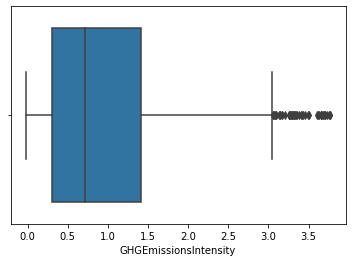

In [28]:
ax = sns.boxplot(x=nonResid["GHGEmissionsIntensity"])

# Compliance Status

In [29]:
nonResid.groupby(by='ComplianceStatus').agg('count')
#https://www.seattle.gov/Documents/Departments/Environment/ClimateChange/EBR-Data-Accuracy.pdf

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,TotalGHGEmissions,GHGEmissionsIntensity
ComplianceStatus,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Compliant,1267,1267,1267,1267,1267,1244,1244,1244,1234,1267,1267,1267,1267,1267,1267,1267,1267,1267,1267,1267,1261,1257,1257,654,654,835,1267,1266,1267,1267,1267,1266,1267,1267,1267,1267,1267,1267,1267,1267
Error - Correct Default Data,87,87,87,87,87,87,87,87,84,87,87,87,87,87,87,87,87,87,87,87,87,87,87,6,6,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87
Non-Compliant,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,4,4,8,13,13,13,13,13,13,13,13,13,13,13,13,13,13


### Non-Compliant

In [30]:
#nonResid.loc[nonResid["ComplianceStatus"] == "Non-Compliant"]

In [31]:
#bâtiment compliant
def Compare_Compliant_2_other(dt, ind1, ind2, other_name, labelY, xlim=[0,10000], ylim=[0,10000], labelX="PropertyGFABuilding(s)"):
    """
    Fonction pour automatiser les graphiques 
    Arguments:
        _dt: data Frame
        _ind1: row indice (booleen)
        _ind2: row indice (booleen)
        _labelY:  (str)
        _xlim: list with 
        _labelX:  (str)
    """
    X = dt.loc[ind1,["PropertyGFABuilding(s)"]]
    Y = dt.loc[ind1,[labelY]]
    plt.scatter(X, Y, color = "blue", alpha = 0.3, label = "Compliant")
    
    X = dt.loc[ind2,["PropertyGFABuilding(s)"]]
    Y = dt.loc[ind2,[labelY]]
    
    plt.scatter(X, Y, color = "green", alpha =0.3, label= other_name)
    #plt.title("Total C02 emmision as fuction superficy")
    #Plot parameters
    plt.ylabel(labelY, size =18)
    plt.xlabel(labelX, size =18)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.legend()


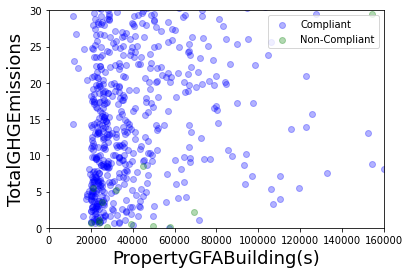

In [32]:
ind1 = nonResid["ComplianceStatus"] == "Compliant"
ind2 = nonResid["ComplianceStatus"] == "Non-Compliant"
Compare_Compliant_2_other(nonResid, ind1, ind2, other_name = "Non-Compliant", 
                          labelY="TotalGHGEmissions", xlim=[0,160000], ylim=[0,30], 
                          labelX="PropertyGFABuilding(s)")

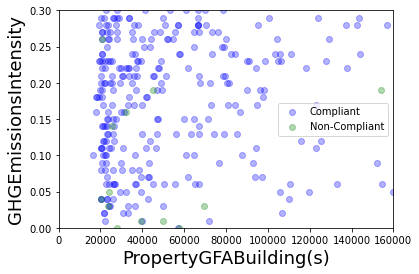

In [33]:
ind1 = nonResid["ComplianceStatus"] == "Compliant"
ind2 = nonResid["ComplianceStatus"] == "Non-Compliant"
Compare_Compliant_2_other(nonResid, ind1, ind2, other_name = "Non-Compliant", 
                          labelY="GHGEmissionsIntensity", xlim=[0,160000], ylim=[0,0.3], 
                          labelX="PropertyGFABuilding(s)")

### Error - Correct Default Data

In [34]:
nonResid.loc[nonResid["ComplianceStatus"] == "Error - Correct Default Data"]
#Bâtiment qui sont des outliers

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
22,28,2016,SPS-District K-12,K-12 School,Graham Hill Elementary,5149 S. Graham St.,Seattle,WA,98118.0,1102000138,2,SOUTHEAST,47.54576,-122.26853,1961,1.0,2.0,56228,0,56228,K-12 School,K-12 School,58916.0,NaN,NaN,95.0,26.100000,29.100000,60.700001,64.599998,1.539478e+06,1.713624e+06,0.0,274605.90630,9.369550e+05,6025.229004,6.025230e+05,True,Error - Correct Default Data,38.53,0.69
30,36,2016,SPS-District K-12,K-12 School,Jane Addams Middle,11051 34th Ave. N.E.,Seattle,WA,98125.0,0752000170,5,NORTH,47.70994,-122.29301,1949,1.0,2.0,160645,0,160645,K-12 School,K-12 School,164229.0,NaN,NaN,75.0,41.299999,47.500000,68.099998,75.699997,6.779173e+06,7.800350e+06,0.0,570809.18750,1.947601e+06,48315.718750,4.831572e+06,True,Error - Correct Default Data,270.18,1.68
38,51,2016,SPS-District K-12,K-12 School,Eckstein Middle,3003 N.E. 75th St.,Seattle,WA,98115.0,0425049022,4,NORTHEAST,47.68252,-122.29498,1950,1.0,2.0,175565,0,175565,K-12 School,K-12 School,182861.0,NaN,NaN,88.0,35.000000,40.099998,55.000000,60.400002,6.399128e+06,7.329818e+06,0.0,468840.50000,1.599684e+06,47994.433590,4.799443e+06,True,Error - Correct Default Data,266.05,1.52
86,125,2016,SPS-District K-12,K-12 School,Mercer International Middle,1600 Columbian Way S.,Seattle,WA,98108.0,1624049214,2,GREATER DUWAMISH,47.56413,-122.31208,1957,1.0,1.0,130862,0,130862,K-12 School,K-12 School,134446.0,NaN,NaN,61.0,48.000000,54.299999,85.599998,93.500000,6.456026e+06,7.300978e+06,0.0,663194.50000,2.262820e+06,41932.066410,4.193207e+06,True,Error - Correct Default Data,238.48,1.82
87,127,2016,SPS-District K-12,K-12 School,Orca K-8 School,5215 46th Ave. S.,Seattle,WA,98118.0,1704900242,2,SOUTHEAST,47.55478,-122.27596,1989,1.0,3.0,59955,0,59955,K-12 School,K-12 School,59955.0,NaN,NaN,93.0,27.200001,29.200001,78.699997,83.000000,1.633399e+06,1.749171e+06,0.0,420989.40630,1.436416e+06,1969.832520,1.969830e+05,True,Error - Correct Default Data,20.48,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3036,27955,2016,SPS-District K-12,K-12 School,Montlake Elementary,2409 22nd Ave. E.,Seattle,WA,98112.0,6788200735,3,EAST,47.64063,-122.30428,1925,1.0,2.0,27273,0,27273,K-12 School,K-12 School,27273.0,NaN,NaN,90.0,46.099998,52.700001,81.900002,90.900002,1.258619e+06,1.436271e+06,0.0,127941.00000,4.365350e+05,8220.842773,8.220840e+05,True,Error - Correct Default Data,46.70,1.71
3126,39332,2016,SPS-District K-12,K-12 School,South Shore K-8,4800 S. Henderson,Seattle,WA,98118.0,2123700250,2,SOUTHEAST,47.52374,-122.27201,2009,1.0,2.0,138705,0,138705,K-12 School,K-12 School,138705.0,NaN,NaN,84.0,35.799999,38.500000,82.800003,85.699997,4.959298e+06,5.344758e+06,0.0,880538.00000,3.004396e+06,19549.021480,1.954902e+06,True,Error - Correct Default Data,124.77,0.90
3366,50210,2016,Nonresidential COS,Office,Central West HQ / Brown Bear,1403 w howe,Seattle,WA,NaN,2425039137,7,MAGNOLIA / QUEEN ANNE,47.63572,-122.37525,1952,1.0,1.0,13661,0,13661,Office,Office,13661.0,NaN,NaN,75.0,36.799999,40.900002,115.500000,128.399994,5.026677e+05,5.585251e+05,0.0,147323.50000,5.026678e+05,0.000000,0.000000e+00,True,Error - Correct Default Data,3.50,0.26
3369,50220,2016,Nonresidential COS,Office,Genesee/SC SE H

### Error - Correct Default Data

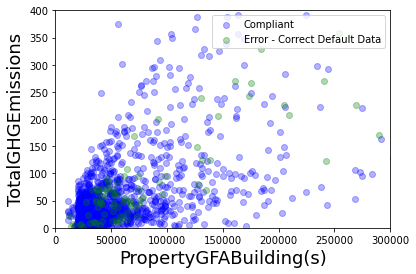

In [35]:
ind1 = nonResid["ComplianceStatus"] == "Compliant"
ind2 = nonResid["ComplianceStatus"] == "Error - Correct Default Data"
Compare_Compliant_2_other(nonResid, ind1, ind2, other_name = "Error - Correct Default Data", 
                          labelY="TotalGHGEmissions", xlim=[0,300000], ylim=[0,400], 
                          labelX="PropertyGFABuilding(s)")

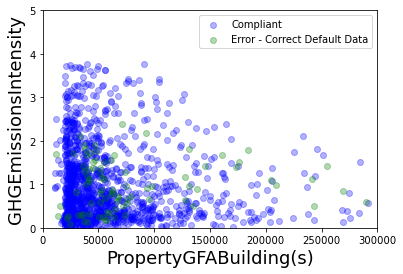

In [36]:
ind1 = nonResid["ComplianceStatus"] == "Compliant"
ind2 = nonResid["ComplianceStatus"] == "Error - Correct Default Data"
Compare_Compliant_2_other(nonResid, ind1, ind2, other_name = "Error - Correct Default Data", 
                          labelY="GHGEmissionsIntensity", xlim=[0,300000], ylim=[0,5], 
                          labelX="PropertyGFABuilding(s)")

In [37]:
#On retire les batiments qui ont comme statut "Error - Correct Default Data"
ind = nonResid["ComplianceStatus"] == "Error - Correct Default Data"
nonResid = nonResid[~ind]

In [38]:
nonResid['BuildingType'].value_counts()

NonResidential        1201
Nonresidential COS      60
SPS-District K-12        9
Campus                   9
Nonresidential WA        1
Name: BuildingType, dtype: int64

La classe **Nonresidential WA** comporte un unique élément, on le modifie pour qu'il intégère la classe **NonResidential**.

In [39]:
nonResid.loc[nonResid['BuildingType'] == "Nonresidential WA", ["BuildingType"]] = "NonResidential"

In [40]:
nonResid['BuildingType'].value_counts()

NonResidential        1202
Nonresidential COS      60
SPS-District K-12        9
Campus                   9
Name: BuildingType, dtype: int64

In [41]:
pd.unique(nonResid['PrimaryPropertyType'].values)

array(['Hotel', 'Other', 'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'K-12 School', 'Large Office',
       'Retail Store', 'Residence Hall', 'Warehouse',
       'Distribution Center', 'Mixed Use Property',
       'Senior Care Community', 'Worship Facility', 'Medical Office',
       'Supermarket / Grocery Store', 'Non-Refrigerated Warehouse',
       'Refrigerated Warehouse', 'Low-Rise Multifamily', 'Restaurant',
       'Laboratory', 'Restaurant\n', 'Hospital'], dtype=object)

In [42]:
nonResid.loc[nonResid['PrimaryPropertyType'] == "Restaurant\n", ['PrimaryPropertyType']] = "Restaurant"

In [43]:
nonResid['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    285
Other                          182
Warehouse                      179
Large Office                   105
Mixed Use Property              87
Retail Store                    79
Worship Facility                71
Hotel                           54
Distribution Center             52
K-12 School                     48
Medical Office                  29
Self-Storage Facility           28
Residence Hall                  19
University                      15
Supermarket / Grocery Store     13
Senior Care Community           11
Refrigerated Warehouse          10
Restaurant                       6
Low-Rise Multifamily             3
Non-Refrigerated Warehouse       2
Laboratory                       1
Hospital                         1
Name: PrimaryPropertyType, dtype: int64

# Exportation des données

In [44]:
nonResid.to_csv("clean_data.csv")